# Introduction

Do higher film budgets lead to more box office revenue? Let's find out if there's a relationship using the movie budgets and financial performance data that was scraped from [the-numbers.com](https://www.the-numbers.com/movie/budgets) on **May 1st, 2018**. 

<img src=https://i.imgur.com/kq7hrEh.png>

The question we want to answer today is: 

- Do higher film budgets lead to more revenue in the box office? 
- In other words, should a movie studio spend more on a film to make more? 

# Import Statements

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Notebook Presentation

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Read the Data

In [3]:
data = pd.read_csv('cost_revenue_dirty.csv')

# Explore and Clean the Data

**Challenge**: Answer these questions about the dataset:
1. How many rows and columns does the dataset contain?
2. Are there any NaN values present?
3. Are there any duplicate rows?
4. What are the data types of the columns?

With any new dataset, it's a good idea to do some standard checks and conversions. 

Typically always first look at 

.shape, 
.head(), 
.tail(), 
.info() 
and .sample()

In [9]:
data.tail()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5386,2950,10/8/2018,Meg,"$15,000,000",$0,$0
5387,126,12/18/2018,Aquaman,"$160,000,000",$0,$0
5388,96,12/31/2020,Singularity,"$175,000,000",$0,$0
5389,1119,12/31/2020,Hannibal the Conqueror,"$50,000,000",$0,$0
5390,2517,12/31/2020,"Story of Bonnie and Clyde, The","$20,000,000",$0,$0


There are thousands of entries in the DataFrame 
- one entry for each movie. 

We'll have some challenges formatting the data before we can do more analysis because we have non-numeric characters in our budget and revenue columns.

In [10]:
# We can check for NaN values with this line:
data.isna().values.any()

False

In [14]:
# check for duplicates with this line:
data.duplicated().values.any()

False

We can see the total number of duplicates by creating a subset and looking at the length of that subset:

In [15]:
duplicated_rows = data[data.duplicated()]
len(duplicated_rows)

0

We can also see if there are null values in .info(), which also shows us that we need to do some type conversion.

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   5391 non-null   int64 
 1   Release_Date           5391 non-null   object
 2   Movie_Title            5391 non-null   object
 3   USD_Production_Budget  5391 non-null   object
 4   USD_Worldwide_Gross    5391 non-null   object
 5   USD_Domestic_Gross     5391 non-null   object
dtypes: int64(1), object(5)
memory usage: 252.8+ KB


### Data Type Conversions

**Challenge**: Convert the `USD_Production_Budget`, `USD_Worldwide_Gross`, and `USD_Domestic_Gross` columns to a numeric format by removing `$` signs and `,`. 
<br>
<br>
Note that *domestic* in this context refers to the United States.

In order to convert the data in the budget and revenue columns and remove all the non-numeric characters, we can use a nested for loop.

We create two Python lists: 
- the characters to remove
- the column names.

Inside the nested loop we can combine .replace() and .to_numeric() to achieve our goal.

In [21]:
chars_to_remove = [',', '$']
columns_to_clean = ['USD_Production_Budget', 
                    'USD_Worldwide_Gross',
                    'USD_Domestic_Gross']

for col in columns_to_clean:
    for char in chars_to_remove:
        # Replace each character with an empty string
        data[col] = data[col].astype(str).str.replace(char, "", regex=True)
    # Convert column to a numeric data type
    data[col] = pd.to_numeric(data[col])

**Challenge**: Convert the `Release_Date` column to a Pandas Datetime type. 

In [22]:
data.Release_Date = pd.to_datetime(data.Release_Date)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Rank                   5391 non-null   int64         
 1   Release_Date           5391 non-null   datetime64[ns]
 2   Movie_Title            5391 non-null   object        
 3   USD_Production_Budget  5391 non-null   int64         
 4   USD_Worldwide_Gross    5391 non-null   int64         
 5   USD_Domestic_Gross     5391 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 252.8+ KB


### Descriptive Statistics

**Challenge**: 

1. What is the average production budget of the films in the data set?
2. What is the average worldwide gross revenue of films?
3. What were the minimums for worldwide and domestic revenue?
4. Are the bottom 25% of films actually profitable or do they lose money?
5. What are the highest production budget and highest worldwide gross revenue of any film?
6. How much revenue did the lowest and highest budget films make?

We can answer many of the questions with a single command: .describe().

In [29]:
data.describe()

,Rank,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,USD_Profit
count,"5,391.00","5,391.00","5,391.00","5,391.00","5,391.00"
mean,"2,696.00","31,113,737.58","88,855,421.96","41,235,519.44","57,741,684.38"
std,"1,556.39","40,523,796.88","168,457,757.00","66,029,346.27","140,972,329.93"
min,1.00,"1,100.00",0.00,0.00,"-175,000,000.00"
25%,"1,348.50","5,000,000.00","3,865,206.00","1,330,901.50","-2,244,775.00"
50%,"2,696.00","17,000,000.00","27,450,453.00","17,192,205.00","8,122,000.00"
75%,"4,043.50","40,000,000.00","96,454,455.00","52,343,687.00","59,518,660.00"
max,"5,391.00","425,000,000.00","2,783,918,982.00","936,662,225.00","2,358,918,982.00"


This desc statistics may tell us that quite a lot of films lose money. 

And all the films in the bottom quartile seems to lose money, since the average cost is 5 million and they only bring in 3.8m in worldwide revenue

But this is not correct because the quartile with respect to cost is basically a different set of movies, than the quartile of revenue. 

Just consider sorting once by revenue and once by Budget, this is in general a different sorting right?

This means that if you take the revenue that is smaller or equal to 25% of all the movies, this is concerning different movies then with respect to Budget.

So the "25%" of the movies is calculated column by column.

To Prove this:

1. Calculate the Profit = Revenue - Budget
2. Check if above is smaller or bigger than 0. If the Budget is larger than the Revenue, the value is obviously gonna be negative
3. Filter the data-set based on quartile (25%) based on USD_Production_Budget, and count the profitable and non profitable movies

In [30]:
# calculate Profit and add the result to an additional column
data["USD_Profit"] = data.USD_Worldwide_Gross - data.USD_Production_Budget
# some result will show negative values

In [32]:
# returns boolean if Movie is profitable or not
# this will return an entire column containing True or False values
# depending on whether or not the profit is negative or positive
data['Movie_is_Profitable'] = data['USD_Profit'].apply(lambda x: x > 0)

In [33]:
# define 25% percentile according to the Worldwide Gross
# (finding the 0.25 quantile out of the worldwide gross column)
world_wide_gross_25percentile = data.USD_Worldwide_Gross.quantile(0.25)

3865206.0


### Explanation:

data[data.USD_Worldwide_Gross <= world_wide_gross_25percentile] 

will return ALL rows where the USD_Worldwide_Gross is less than the 25% quantile value (which is 3.8M)

in this case, around 1348 rows are returned

now we wanna check the status of the profit. How many of these 25% bottom movie are profitable?

To find out, we wanna count by the Movie_is_Profitable column. We wanna count the total unique values found inside Movie_is_Profitable column. Which is achieved by chaining .value_count() method to the column we wanna count

Movie_is_Profitable column only contain true and false, so .value_count() will count how many times True occur and how many times False occur throughout the column 

This way we can see how many movies are actually profitable (represented in true or false)


In [36]:
# Grouped Count by Profitability Yes/No
data[data.USD_Worldwide_Gross <= world_wide_gross_25percentile].Movie_is_Profitable.value_counts()

False    1175
True      173
Name: Movie_is_Profitable, dtype: int64

With this, unlike what's told by the descriptive statistics, we found that not ALL bottom quartile movie lost money. There are actually ***173*** movies from the bottom quartile that earns profit

#### Find which film has the lowest budget in the dataset:

In [38]:
data[data.USD_Production_Budget == 1100.00]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,USD_Profit,Movie_is_Profitable
2427,5391,2005-05-08,My Date With Drew,1100,181041,181041,179941,True


#### Find highest budget film in the dataset:

In [39]:
data[data.USD_Production_Budget == 425000000.00]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,USD_Profit,Movie_is_Profitable
3529,1,2009-12-18,Avatar,425000000,2783918982,760507625,2358918982,True


# Investigating the Zero Revenue Films

**Challenge** How many films grossed $0 domestically (i.e., in the United States)? What were the highest budget films that grossed nothing?

In [42]:
zero_domestic = data[data.USD_Domestic_Gross == 0]
zero_domestic.sort_values('USD_Production_Budget', ascending=False)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,USD_Profit,Movie_is_Profitable
5388,96,2020-12-31,Singularity,175000000,0,0,-175000000,False
5387,126,2018-12-18,Aquaman,160000000,0,0,-160000000,False
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0,-103000000,False
5385,366,2018-10-08,Amusement Park,100000000,0,0,-100000000,False
5090,556,2015-12-31,"Don Gato, el inicio de la pandilla",80000000,4547660,0,-75452340,False
...,...,...,...,...,...,...,...,...
4787,5371,2014-12-31,Stories of Our Lives,15000,0,0,-15000,False
3056,5374,2007-12-31,Tin Can Man,12000,0,0,-12000,False
4907,5381,2015-05-19,Family Motocross,10000,0,0,-10000,False
5006,5389,2015-09-29,Signed Sealed Delivered,5000,0,0,-5000,False


**Challenge**: How many films grossed $0 worldwide? What are the highest budget films that had no revenue internationally?

In [43]:
zero_worldwide = data[data.USD_Worldwide_Gross == 0]
zero_worldwide.sort_values('USD_Production_Budget', ascending=False)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,USD_Profit,Movie_is_Profitable
5388,96,2020-12-31,Singularity,175000000,0,0,-175000000,False
5387,126,2018-12-18,Aquaman,160000000,0,0,-160000000,False
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0,-103000000,False
5385,366,2018-10-08,Amusement Park,100000000,0,0,-100000000,False
5058,880,2015-11-12,The Ridiculous 6,60000000,0,0,-60000000,False
...,...,...,...,...,...,...,...,...
4787,5371,2014-12-31,Stories of Our Lives,15000,0,0,-15000,False
3056,5374,2007-12-31,Tin Can Man,12000,0,0,-12000,False
4907,5381,2015-05-19,Family Motocross,10000,0,0,-10000,False
5006,5389,2015-09-29,Signed Sealed Delivered,5000,0,0,-5000,False


### Filtering on Multiple Conditions

which films made money internationally (i.e., data.USD_Worldwide_Gross != 0), but had zero box office revenue in the United States (i.e., data.USD_Domestic_Gross == 0)? 

How would we create a filter for these two conditions? 

One approach is to use the .loc[] property combined with the bitwise and & operator.

Since we're also checking if the domestic revenue was zero and the worldwide revenue was not zero. Because the bitwise operator takes precedence, we need to include parentheses () around the comparisons we'd like to prioritise.

In [44]:
international_releases = data.loc[(data.USD_Domestic_Gross == 0) & 
                                  (data.USD_Worldwide_Gross != 0)]
print(international_releases)

      Rank Release_Date              Movie_Title  USD_Production_Budget  \
71    4310   1956-02-16                 Carousel                3380000   
1579  5087   2001-02-11  Everything Put Together                 500000   
1744  3695   2001-12-31                 The Hole                7500000   
2155  4236   2003-12-31                  Nothing                4000000   
2203  2513   2004-03-31                The Touch               20000000   
...    ...          ...                      ...                    ...   
5340  1506   2017-04-14      Queen of the Desert               36000000   
5348  2225   2017-05-05        Chāi dàn zhuānjiā               23000000   
5360  4832   2017-07-03                Departure                1100000   
5372  1856   2017-08-25                Ballerina               30000000   
5374  4237   2017-08-25     Polina danser sa vie                4000000   

      USD_Worldwide_Gross  USD_Domestic_Gross  USD_Profit  Movie_is_Profitable  
71                

Pandas is built on top of NumPy, which uses Python's bitwise operators. And these bitwise operators allow us to do comparisons on an element by element basis in both NumPy and Pandas

However, this is not the only technique we can use to make multiple comparisons:

In this case, we enclose the entire query inside a string:

**Challenge**: Use the [`.query()` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html) to accomplish the same thing. Create a subset for international releases that had some worldwide gross revenue, but made zero revenue in the United States. 

Hint: This time you'll have to use the `and` keyword.

In [45]:
international_releases = data.query('USD_Domestic_Gross == 0 and USD_Worldwide_Gross != 0')

print(f'Number of international releases: {len(international_releases)}')

international_releases.tail()

Number of international releases: 155


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,USD_Profit,Movie_is_Profitable
5340,1506,2017-04-14,Queen of the Desert,36000000,1480089,0,-34519911,False
5348,2225,2017-05-05,Chāi dàn zhuānjiā,23000000,58807172,0,35807172,True
5360,4832,2017-07-03,Departure,1100000,27561,0,-1072439,False
5372,1856,2017-08-25,Ballerina,30000000,48048527,0,18048527,True
5374,4237,2017-08-25,Polina danser sa vie,4000000,36630,0,-3963370,False


### Unreleased Films

**Challenge**:
* Identify which films were not released yet as of the time of data collection (May 1st, 2018).
* How many films are included in the dataset that have not yet had a chance to be screened in the box office? 
* Create another DataFrame called data_clean that does not include these films. 

In [47]:
# Date of Data Collection
scrape_date = pd.Timestamp('2018-5-1')

In [53]:
future_releases = data[data.Release_Date >= scrape_date]

In [55]:
# Create a new dataFrame called data_clean
# to work with data that does NOT include these films

data_clean = data.drop(future_releases.index)

### Films that Lost Money

**Challenge**: 
What is the percentage of films where the production costs exceeded the worldwide gross revenue? 

In [56]:
lost_money = data_clean[data_clean.USD_Production_Budget > data_clean.USD_Worldwide_Gross]


      Rank Release_Date                       Movie_Title  \
1     5140   1916-05-09                       Intolerance   
6     4630   1927-12-08                             Wings   
8     4240   1930-01-01                     Hell's Angels   
15    4738   1936-05-02                      Modern Times   
17    4814   1936-10-20  Charge of the Light Brigade, The   
...    ...          ...                               ...   
5371  4901   2017-07-28            An Inconvenient Sequel   
5373  2161   2017-08-25                       Tulip Fever   
5374  4237   2017-08-25              Polina danser sa vie   
5381    94   2017-12-05  King Arthur: Legend of the Sword   
5383  2521   2017-12-31                The Thousand Miles   

      USD_Production_Budget  USD_Worldwide_Gross  USD_Domestic_Gross  \
1                    385907                    0                   0   
6                   2000000                    0                   0   
8                   4000000                    0   

# Seaborn for Data Viz: Bubble Charts

To create a .scatterplot(), all we need to do is supply our DataFrame and the column names that we'd like to see on our axes.

### Plotting Movie Releases over Time

**Challenge**: Try to create the following Bubble Chart:

<img src=https://i.imgur.com/8fUn9T6.png>



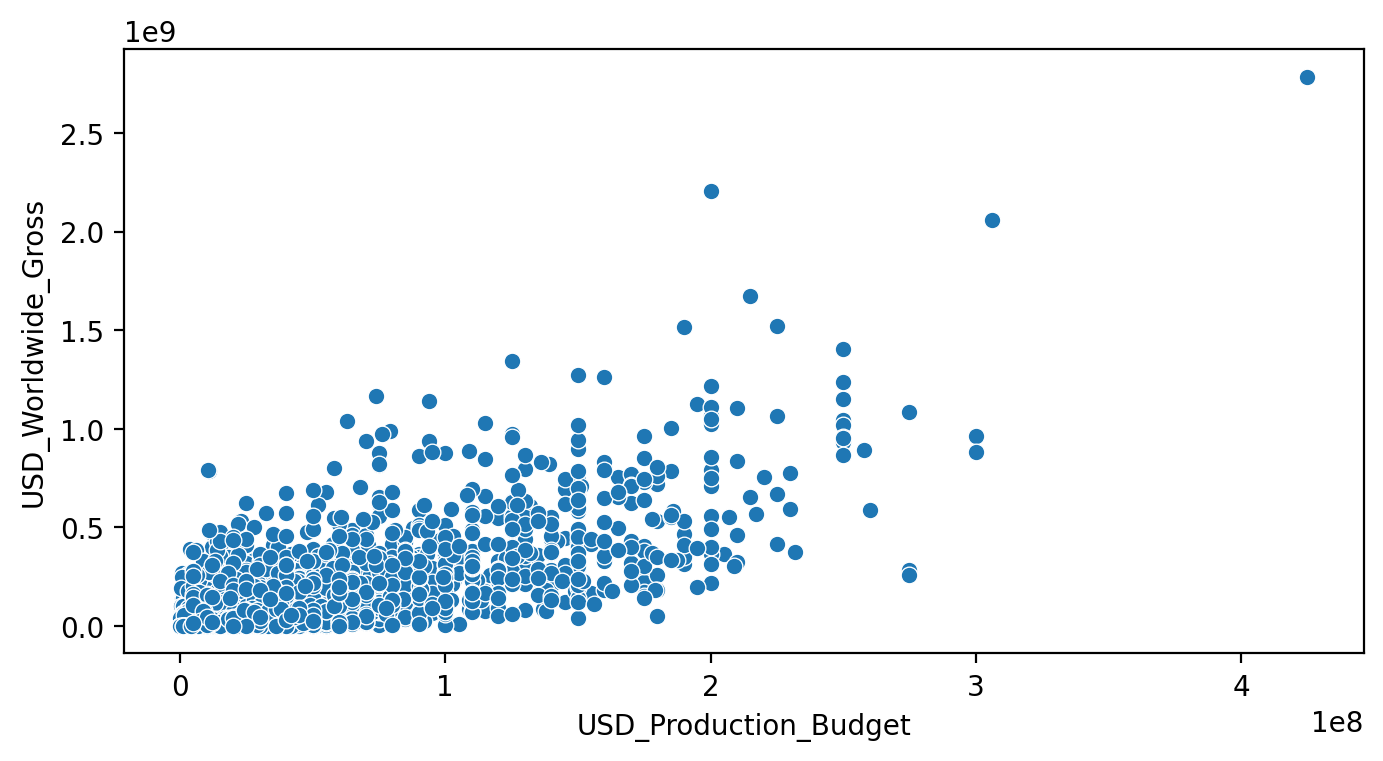

In [59]:
plt.figure(figsize=(8,4), dpi=200)

sns.scatterplot(data=data_clean,
                x='USD_Production_Budget', 
                y='USD_Worldwide_Gross')

plt.show()

And to style our chart we can simply configure the Axes object that is returned from sns.scatterplot().

Seaborn is built on top of Matplotlib. Here we're diving into the Matplotb layer to set the limits on the axes and change the labels:

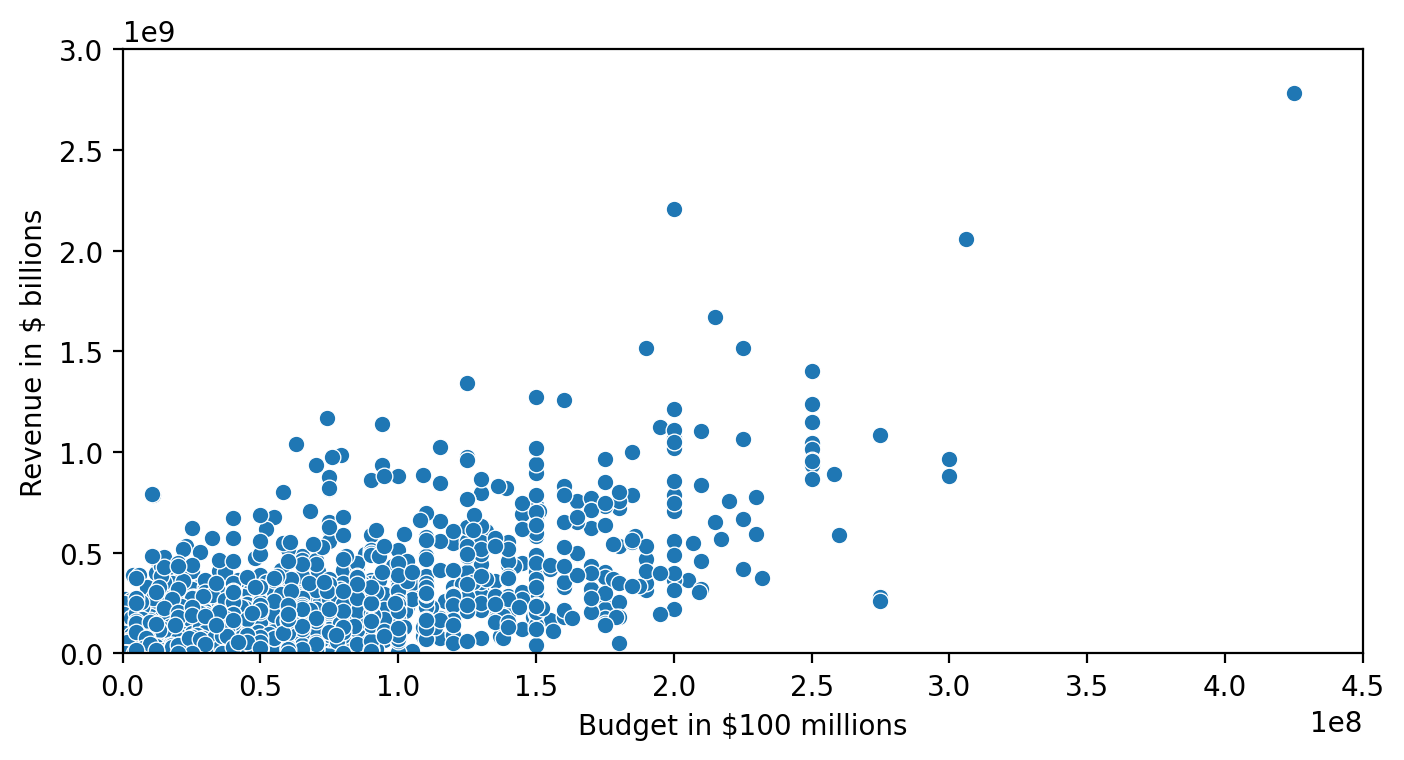

In [60]:
plt.figure(figsize=(8,4), dpi=200)
 
ax = sns.scatterplot(data=data_clean,
                     x='USD_Production_Budget', 
                     y='USD_Worldwide_Gross')
 
ax.set(ylim=(0, 3000000000),
       xlim=(0, 450000000),
       ylabel='Revenue in $ billions',
       xlabel='Budget in $100 millions')
 
plt.show()

#### From Scatter Plot to Bubble Chart

The reason to use Seaborn is because of the hue and size parameters that make it very easy to create a bubble chart. These parameters allow us to colour the data and change their size according to one of the columns in our DataFrame.

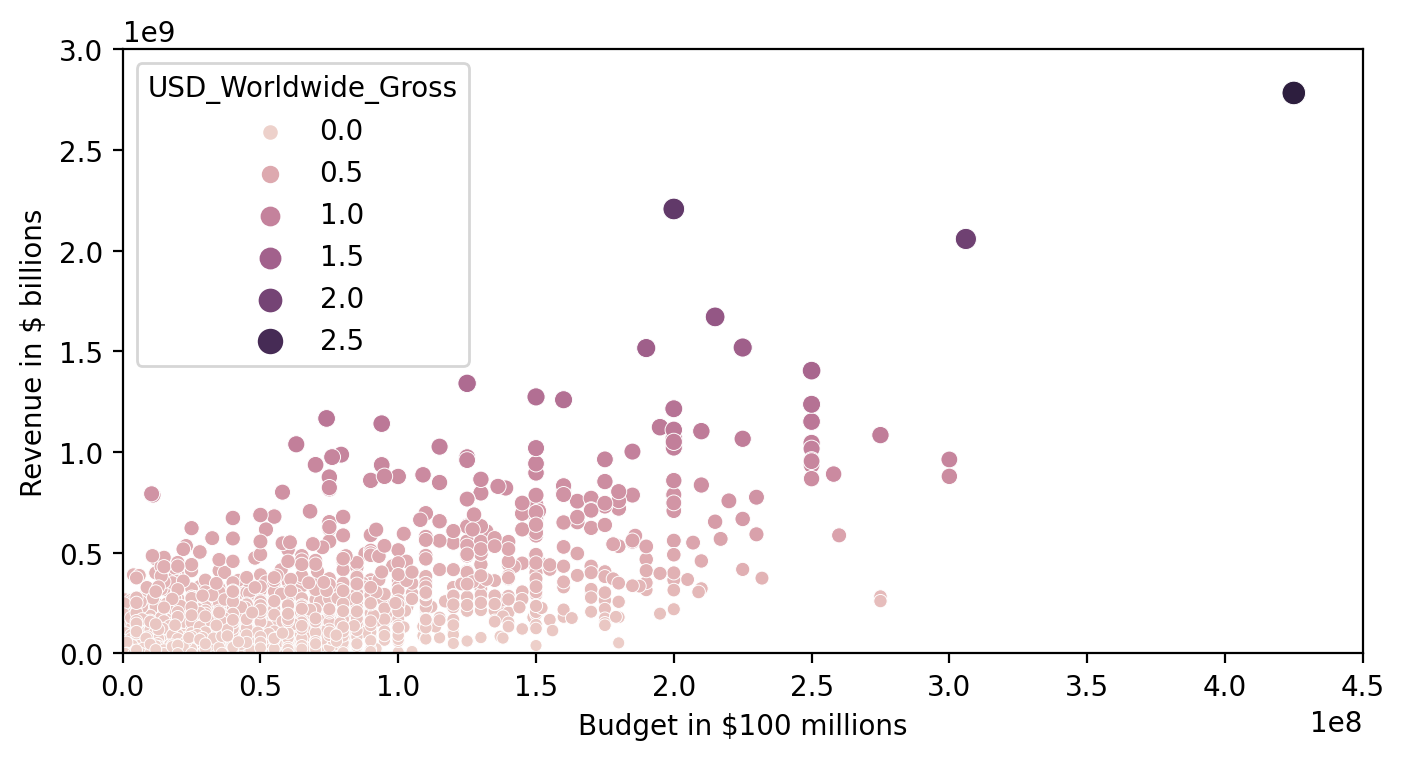

In [61]:
plt.figure(figsize=(8,4), dpi=200)
ax = sns.scatterplot(data=data_clean,
                     x='USD_Production_Budget', 
                     y='USD_Worldwide_Gross',
                     hue='USD_Worldwide_Gross', # colour
                     size='USD_Worldwide_Gross',) # dot size
 
ax.set(ylim=(0, 3000000000),
       xlim=(0, 450000000),
       ylabel='Revenue in $ billions',
       xlabel='Budget in $100 millions',)
 
plt.show()

Now our higher grossing movies are bigger and darker on our chart. That's super handy. But Seaborn offers a number of convenient styling options as well.

To set the styling on a single chart (as opposed to all the charts in the entire notebook) we can use Python's with keyword.

In addition to 'darkgrid', Seaborn has a number of built-in themes. so you can style your chart very quickly. Try out 'whitegrid', 'dark',  or 'ticks' for example.

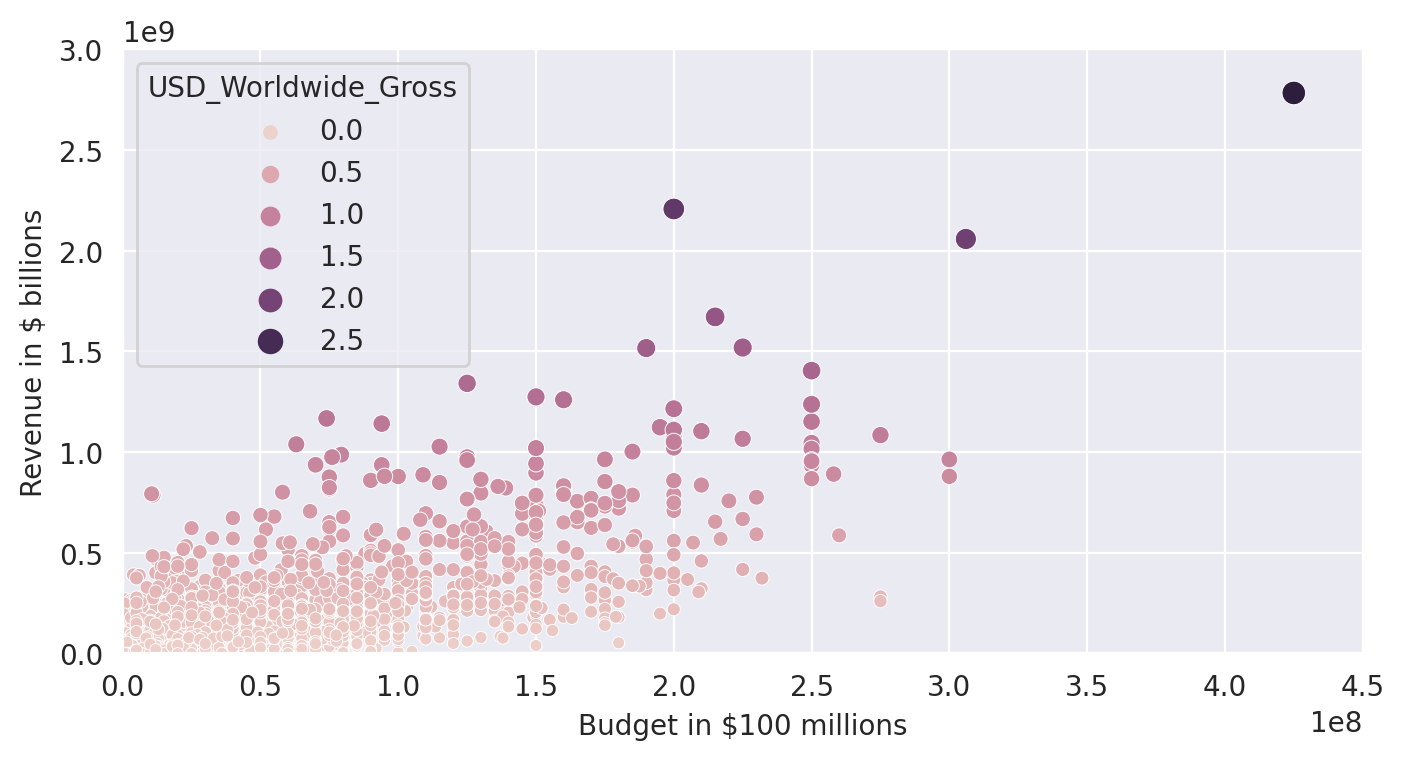

In [65]:
plt.figure(figsize=(8,4), dpi=200)
 
# set styling on a single chart
with sns.axes_style('darkgrid'):
  ax = sns.scatterplot(data=data_clean,
                       x='USD_Production_Budget', 
                       y='USD_Worldwide_Gross',
                       hue='USD_Worldwide_Gross',
                       size='USD_Worldwide_Gross')
 
  ax.set(ylim=(0, 3000000000),
        xlim=(0, 450000000),
        ylabel='Revenue in $ billions',
        xlabel='Budget in $100 millions')

#### Movie Budgets over Time:

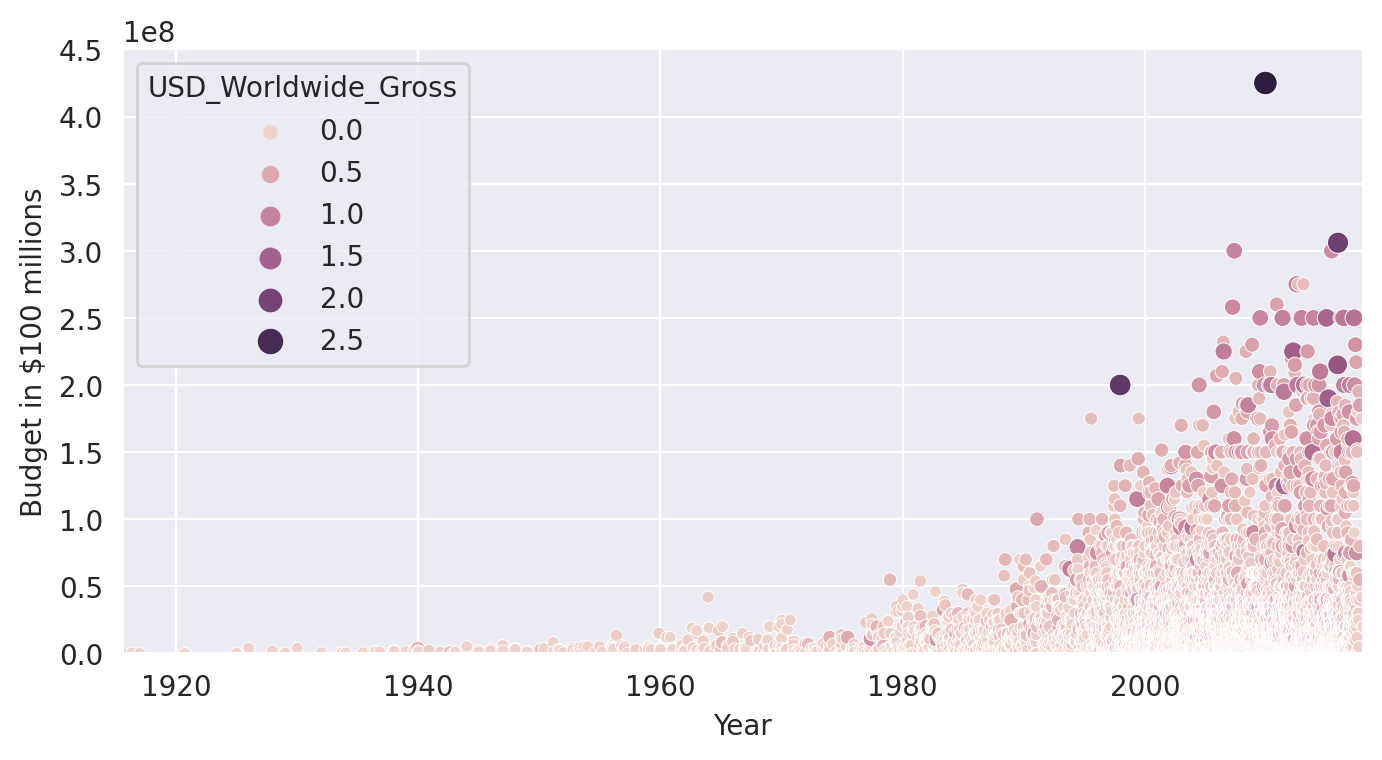

In [66]:
plt.figure(figsize=(8,4), dpi=200)
 
with sns.axes_style("darkgrid"):
    ax = sns.scatterplot(data=data_clean, 
                    x='Release_Date', 
                    y='USD_Production_Budget',
                    hue='USD_Worldwide_Gross',
                    size='USD_Worldwide_Gross',)
 
    ax.set(ylim=(0, 450000000),
           xlim=(data_clean.Release_Date.min(), data_clean.Release_Date.max()),
           xlabel='Year',
           ylabel='Budget in $100 millions')

### Analysis:

- first off, movie budgets have just exploded in the last 40 years or so. 
- Up until the 1970s, the film industry appears to have been in an entirely different era. 
- Budgets started growing fast from the 1980s onwards and continued to grow through the 2000s. 
- The industry has grown massively, producing many more films than before. 
- The number of data points is so dense from 2000 onwards that they are overlapping.

# Converting Years to Decades Trick

**Challenge**: Create a column in `data_clean` that has the decade of the release. 

<img src=https://i.imgur.com/0VEfagw.png width=650> 

Here's how: 
1. Create a [`DatetimeIndex` object](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html) from the Release_Date column. 
2. Grab all the years from the `DatetimeIndex` object using the `.year` property.
<img src=https://i.imgur.com/5m06Ach.png width=650>
3. Use floor division `//` to convert the year data to the decades of the films.
4. Add the decades as a `Decade` column to the `data_clean` DataFrame.

To create a DatetimeIndex, we just call the constructor and provide our release date column as an argument to initialise the DatetimeIndex object. 

Then we can extract all the years from the DatetimeIndex.

In [67]:
dt_index = pd.DatetimeIndex(data_clean.Release_Date)
years = dt_index.year
print(years)

Int64Index([1915, 1916, 1916, 1920, 1925, 1925, 1927, 1929, 1930, 1931,
            ...
            2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017],
           dtype='int64', name='Release_Date', length=5384)


Now, we need to convert the years to decades. For that, we will use floor division (aka integer division). The difference to regular division is that the result is effectively rounded down.

Regular division:
5.0 / 2
output: 2.5

Floor division:
5.0 // 2
output: 2.0

In [68]:
#Converting 1999 to 1990 decade
print(1999//10)
print(199*10)

199
1990


In [69]:
# We can do this for all the years and then add the decades back as a column.
decades = years//10*10
data_clean['Decade'] = decades

In [70]:
# Alternatively, shorter way:

data_clean['Decade'] = data_clean.Release_Date.dt.year // 10 * 10

### Separate the "old" (before 1969) and "New" (1970s onwards) Films

**Challenge**: Create two new DataFrames: `old_films` and `new_films`
* `old_films` should include all the films before 1969 (up to and including 1969)
* `new_films` should include all the films from 1970 onwards
* How many films were released prior to 1970?
* What was the most expensive film made prior to 1970?

In [75]:
old_films = data_clean[data_clean.Decade <= 1960]
new_films = data_clean[data_clean.Decade > 1960]

# Seaborn Regression Plots

Visualise the relationship between the movie budget and the worldwide revenue using linear regression.

<AxesSubplot:xlabel='USD_Production_Budget', ylabel='USD_Worldwide_Gross'>

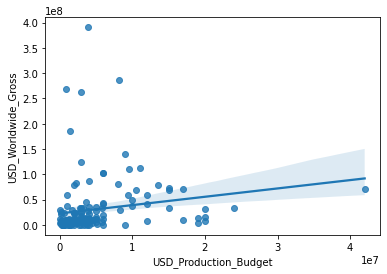

In [76]:
sns.regplot(data=old_films, 
            x='USD_Production_Budget',
            y='USD_Worldwide_Gross')

To style the chart further, 

drop into the Matplotlib layer and supply keyword arguments as dictionaries. 

We can customise the scatter plot (e.g., by changing the transparency of the dots) and the regression line itself (e.g., by changing the colour).

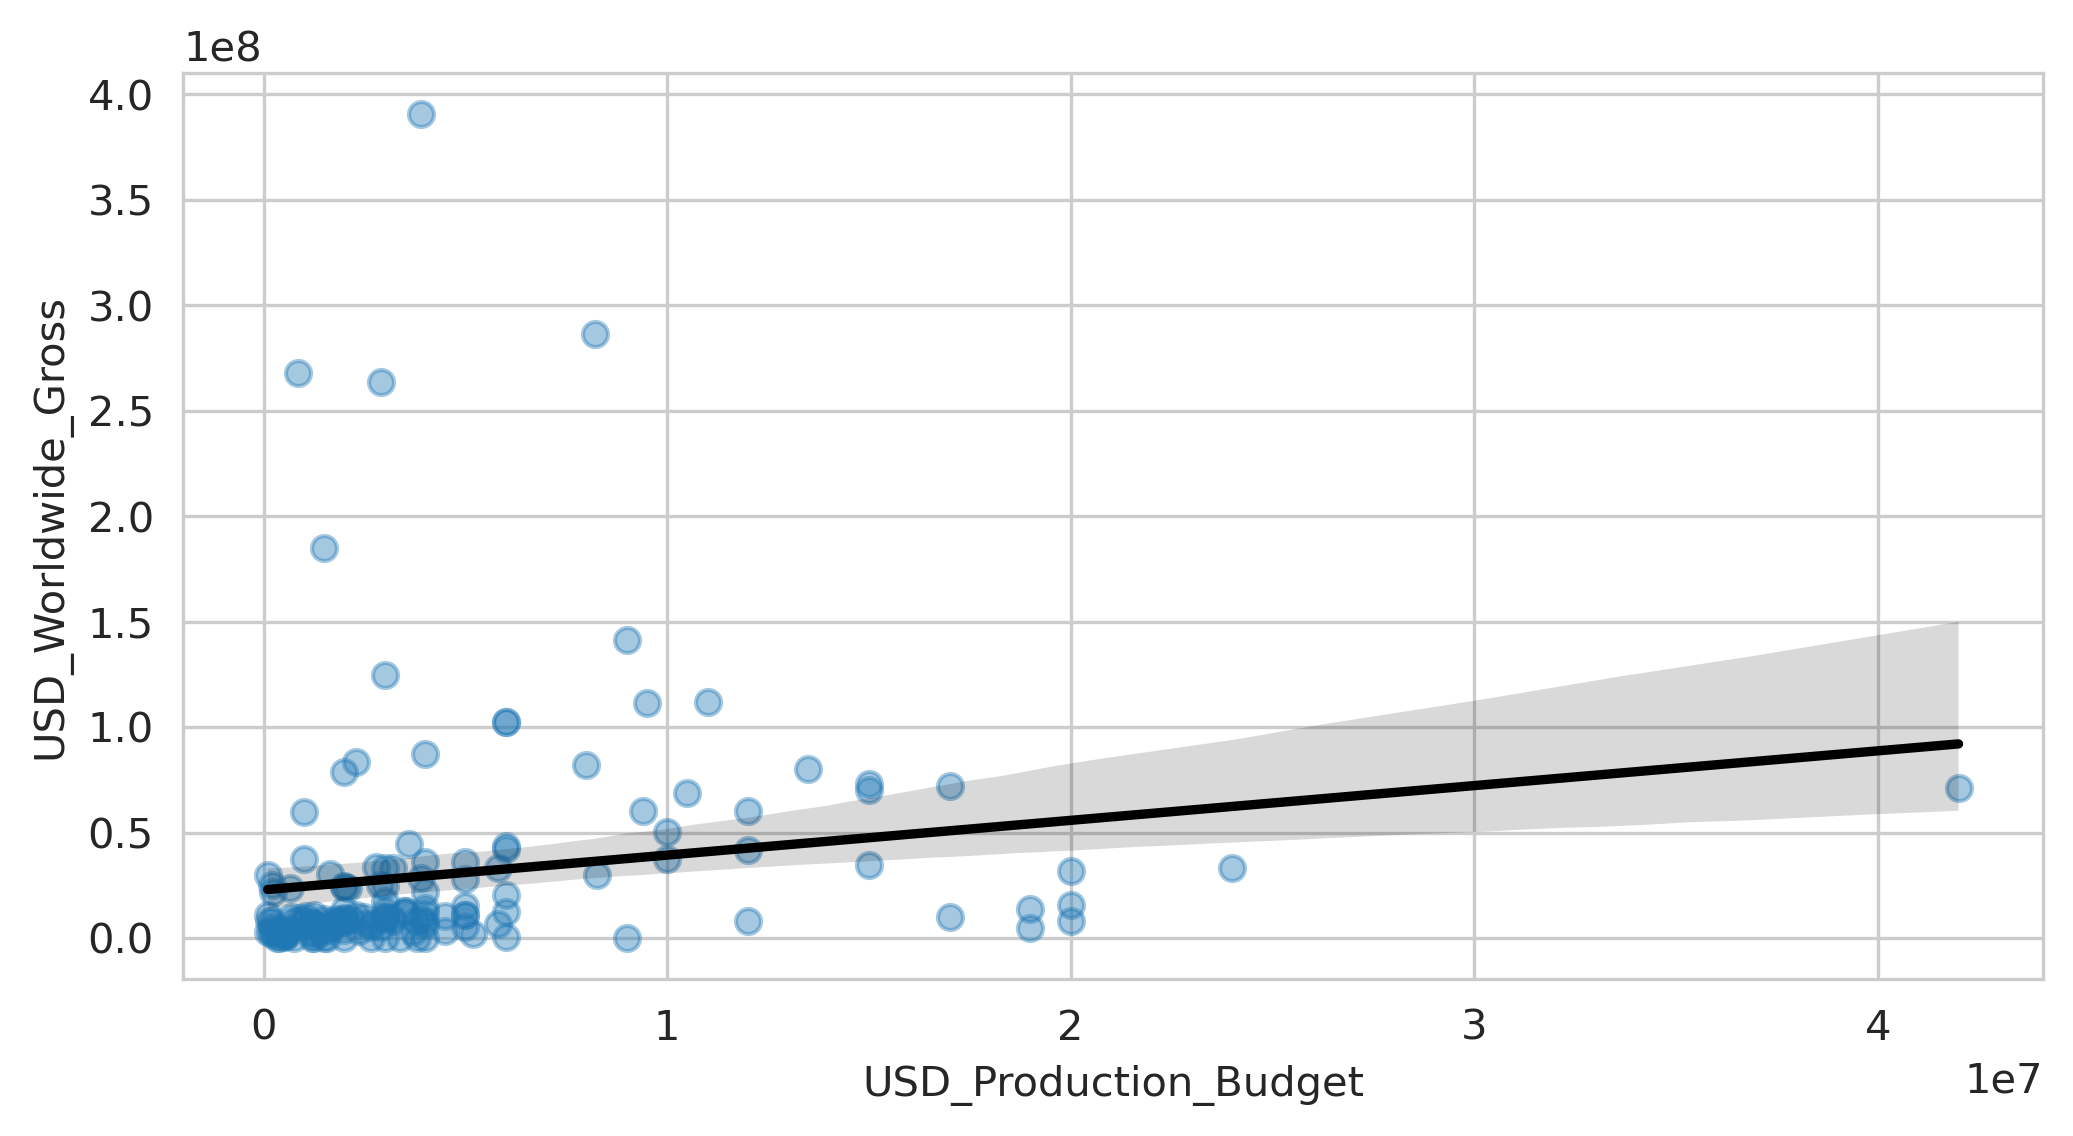

In [78]:
plt.figure(figsize=(8,4), dpi=300)

with sns.axes_style("whitegrid"):
  sns.regplot(data=old_films, 
            x='USD_Production_Budget', 
            y='USD_Worldwide_Gross',
            scatter_kws = {'alpha': 0.4},
            line_kws = {'color': 'black'})

#### Analysis:

- We can spot Cleopatra on the far right. 
- Many lower budget films made much more money 
- The relationship between the production budget and movie revenue is not very strong. 
- Many points on the left are very far away for the line, so the line appears not to capture the relationship between budget and revenue very well at all!

**Challenge**: Use Seaborn's `.regplot()` to show the scatter plot and linear regression line against the `new_films`. 
<br>
<br>
Style the chart

* Put the chart on a `'darkgrid'`.
* Set limits on the axes so that they don't show negative values.
* Label the axes on the plot "Revenue in \$ billions" and "Budget in \$ millions".
* Provide HEX colour codes for the plot and the regression line. Make the dots dark blue (#2f4b7c) and the line orange (#ff7c43).

Interpret the chart

* Do our data points for the new films align better or worse with the linear regression than for our older films?
* Roughly how much would a film with a budget of $150 million make according to the regression line?

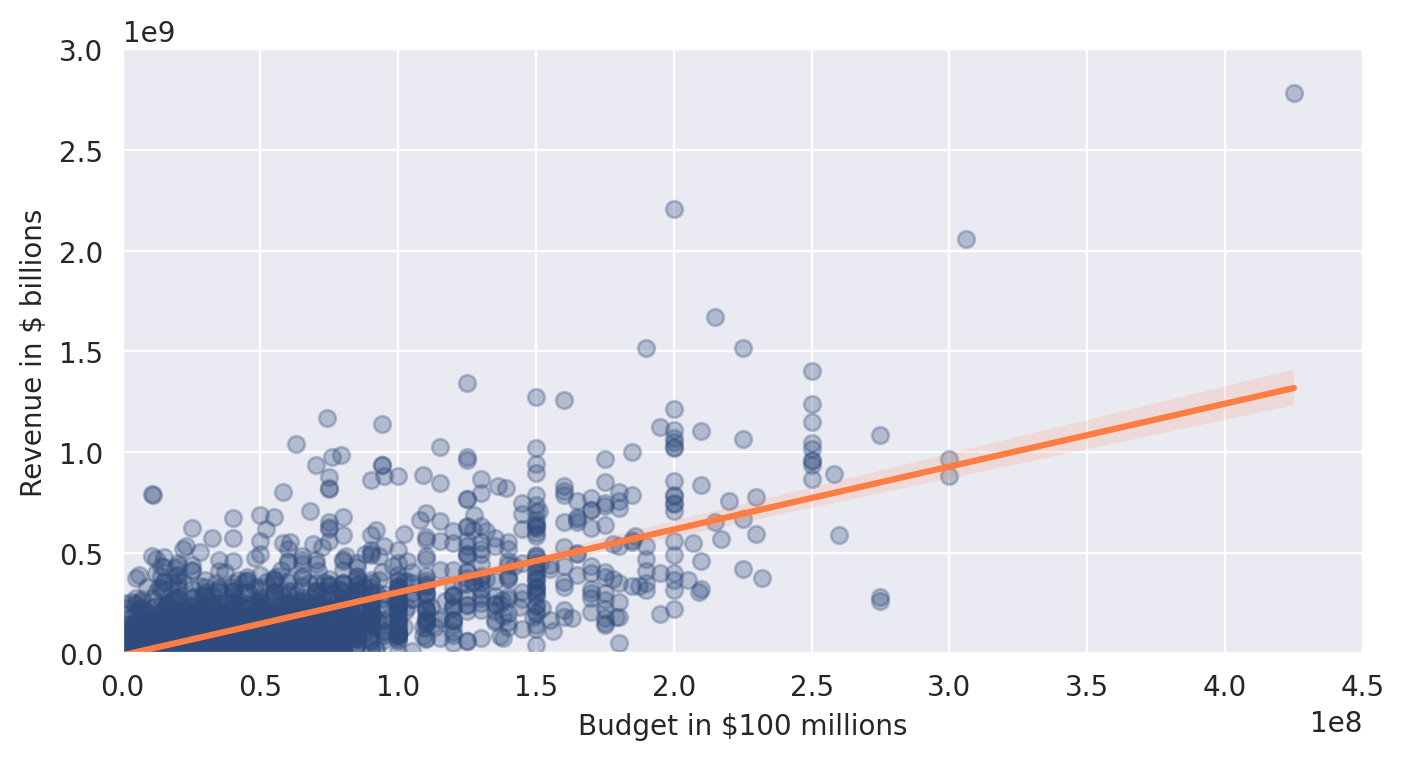

In [79]:
plt.figure(figsize=(8,4), dpi=200)\

with sns.axes_style('darkgrid'):
  ax = sns.regplot(data=new_films,
                   x='USD_Production_Budget',
                   y='USD_Worldwide_Gross',
                   color='#2f4b7c',
                   scatter_kws = {'alpha': 0.3},
                   line_kws = {'color': '#ff7c43'})
  
  ax.set(ylim=(0, 3000000000),
         xlim=(0, 450000000),
         ylabel='Revenue in $ billions',
         xlabel='Budget in $100 millions') 

#### Analysis:

- This time our data points line up much better with our regression line
- Also, the confidence interval is much narrower. 
- We also see that a film with a 150 million budget is predicted to make slightly under 500 million by our regression line.
- There does indeed seem to be a relationship between a film's budget and that film's worldwide revenue.

# Run Your Own Regression with scikit-learn

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

##### Univariate regression

a regression with a single ***explanatory*** variable (our movie BUDGET)

Explanatory variables are also referred to as ***features*** in machine learning terminology

In [80]:
from sklearn.linear_model import LinearRegression

**Challenge**: Run a linear regression for the `old_films`. Calculate the intercept, slope and r-squared. How much of the variance in movie revenue does the linear model explain in this case?

First, let's create a LinearRegression object that will do the work for us:

In [81]:
regression = LinearRegression()

Now we should specify our features and our targets

You will often see the features named capital X and the target named lower case y

LinearRegression does not like receiving Pandas Series (e.g., new_films.USD_Production_Budget), so create new DataFrames:

In [82]:
# Explanatory Variable(s) or Feature(s)
X = pd.DataFrame(new_films, columns=['USD_Production_Budget'])
 
# Response Variable or Target
y = pd.DataFrame(new_films, columns=['USD_Worldwide_Gross']) 

sklearn awaits something with rows and columns.

If we have only one explanatory variable in our model, that would result in 1 column and n rows for sklearn as input.

Thus, we need 2 dimensions. As we have previously learned on the numpy course we await something like that (dim, dim).

Furthermore, a object.shape cmd should return something like (rows, column) for one explanatory variable like USD_Production_Budget

However, if we try data.USD_Production_Budget.shape, we only see the rows, e.g. (5231, ). 

Thus we have only 1 dimension. That is something sklearn cannot cope with.

To circumvent that fact, we do not need to create a new variable from scratch in a dataframe. All we need is a second dimension: The column. Although we could reshape or redim our variable its much more easy.

So instead of writing X = pd.Dataframe ... (like done above) to create a rows, column input you can simply double bracket your original data

X = new_films[["USD_Production_Budget"]]

and you'll get X.shape (5231, 1)

If you had more than one exogenous variable:

[["USD_Production_Budget", "USD_Domestic_Gross"]]

What we are doing here is adding another dimension, to the other variable/s, with that approach, or just reshaping it.

In [83]:
X = new_films[["USD_Production_Budget"]]

y = new_films[["USD_Worldwide_Gross"]]

model = regression.fit(X,y)

print(model.predict([[350000000]]))

print(regression.coef_)

print(regression.intercept_)

[[1.0842578e+09]]
[[3.12259592]]
[-8650768.00661024]


Work and run the calculations:

In [84]:
# Find the best-fit line
regression.fit(X, y)

LinearRegression()

In [85]:
# Finding R-Square:
regression.score(X, y)

0.5577032617720403

# Use Your Model to Make a Prediction

We just estimated the slope and intercept! Remember that our Linear Model has the following form:

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

**Challenge**:  How much global revenue does our model estimate for a film with a budget of $350 million? 

In [86]:
budget = 350000000
revenue_estimate = regression.intercept_[0] + regression.coef_[0,0]*budget
revenue_estimate = round(revenue_estimate, -6)
print(revenue_estimate)

1084000000.0
